# Продажа квартир в Санкт-Петербурге — анализ рынка недвижимости

*Цели и задачи проекта*

Используя данные сервиса Яндекс.Недвижимость, определить рыночную стоимость объектов недвижимости и типичные параметры квартир.

Установить параметры для построения автоматизированной систему отслеживания аномалий и мошеннической деятельности.

*Данные*

В нашем распоряжении архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет.
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.

*Описание данных*

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

*План*

- обзор данных, предобработка
- добавление параметров
- исследовательский анализ данных
- вывод

### Общая информация. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [2]:
data = pd.read_csv('/Users/porphyrion/Desktop/PRACTICUM/my_projects/datasets/real_estate_data.csv', sep='\t')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [3]:
data.info() #общая информация о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
data.duplicated().sum()

0

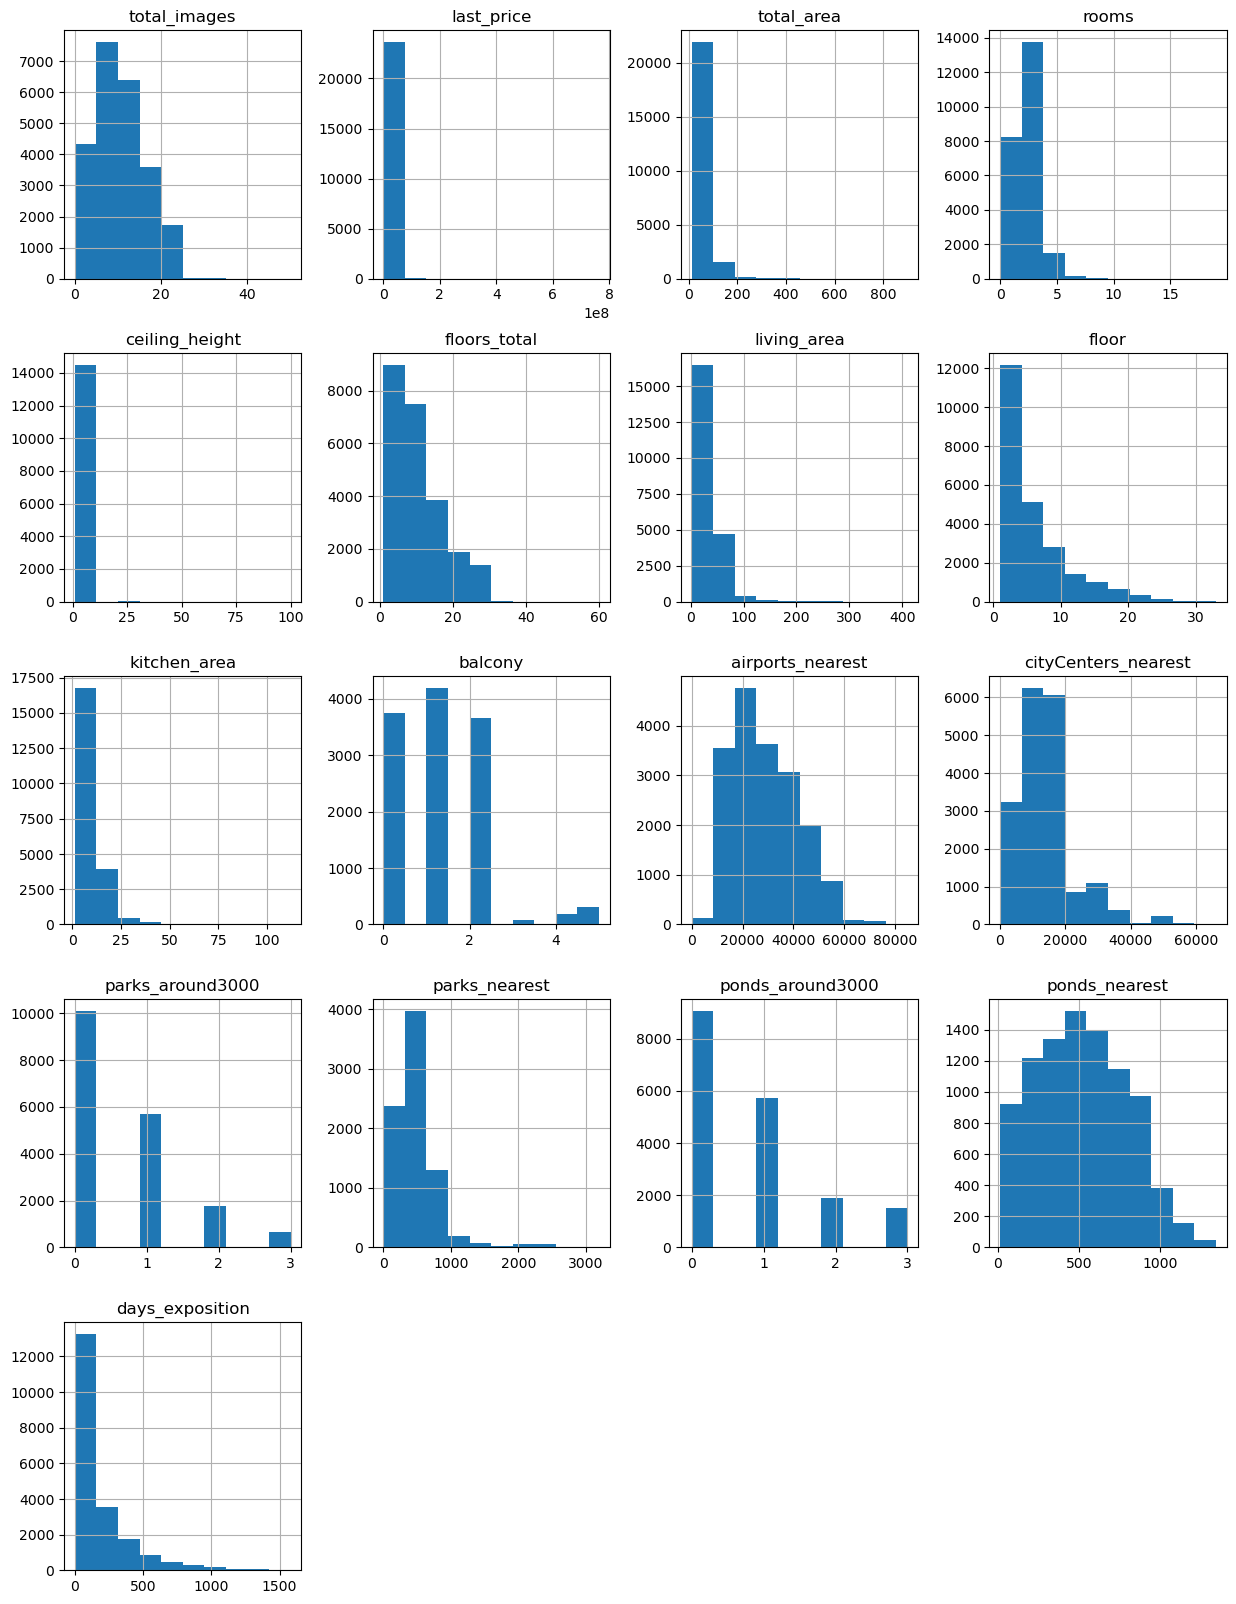

In [5]:
data.hist(figsize=(15, 20))
plt.show()

***Наблюдение.***
Данные содержат 23699 строк, 22 столбца.

Имеются пропуски как в данных, занесенных пользователем, так и в картографических характеристиках.

Данные распределены неравномерно, заметны аномалии и выбросы.

Явных дубликатов нет.

### Предобработка данных

#### Пропуски в данных

In [6]:
data.isna().sum()  #общее количество пропусков в столбцах 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

***Наблюдение.*** 
Пропуски столбцах ceiling_height, floors_total, living_area, kitchen_area, balcony, locality_name скорее всего появились по причине того, что пользователь не заполнил соответствующие данные.

Пропуски в картографических данных могли быть вызваны чрезмерной отдаленностью или отсутствием соответствующих объектов инфраструктуры (парк, пруд, аэропорт) от объекта недвижимости.

Пропуски в столбце is_apartment можно убрать, изменив тип данных на булевый, аналогично данным из столбцов studio и open_plan.

Пропуски в столбце days_exposition с большой долей вероятности относятся к непроданным квартирам.

Предположительно, если пользователь не указал балкон, то такового нет. Заполним нулями.

In [7]:
data['balcony'] = data['balcony'].fillna(0) 

Заполним пропуски в колонке ceiling_height медианным значением по высотности зданий.

In [8]:
for n in data['floors_total'].unique():
    data.loc[(data['floors_total']== n) & (data['ceiling_height'].isna()), 'ceiling_height'] = \
    data.loc[(data['floors_total']== n), 'ceiling_height'].median()

Заполним пропуски с столбце living_area и kitchen_area медианным значением по признаку rooms.

In [9]:
for r in data['rooms'].unique():
    data.loc[(data['rooms']== r) & (data['living_area'].isna()), 'living_area'] = \
    data.loc[(data['rooms']== r), 'living_area'].median()

In [10]:
for k in data['rooms'].unique():
    data.loc[(data['rooms']== k) & (data['kitchen_area'].isna()), 'kitchen_area'] = \
    data.loc[(data['rooms']== k), 'kitchen_area'].median()

In [11]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height             78
floors_total               86
living_area                 0
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area              197
balcony                     0
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Нам удалось заполнить значительную часть пропусков медианным значением по категорийным признакам.

#### Типы данных

Меняем тип данных в столбце first_day_exposition со строкового на datetime, чтобы в дальнейшем можно было с ними работать.
Меняем тип данных в столбце is_apartment, тк это по определению булевый тип данных. Такое действие также позволит заполнить пропуски в этом столбце.

In [12]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

In [13]:
data['is_apartment'] = data['is_apartment'].astype(bool)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23621 non-null  float64       
 6   floors_total          23613 non-null  float64       
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23502 non-null  float64       
 13  balcony         

#### Дубликаты

In [15]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

In [16]:
len(data['locality_name'].unique())

365

In [17]:
for name in ['поселок ', 'посёлок ', 'городского типа ', ' городского типа ','городской ', 'село ', 'деревня ', 'имени ', 'станции ', 'коттеджный ', 'садовое товарищество ', 'при железнодорожной ', 'садоводческое некоммерческое товарищество ']:
    data['locality_name'] = data['locality_name'].str.replace(name,'')
 #удаляем неявные дубликаты в названиях населенных пунктов   

In [18]:
len(data['locality_name'].unique())

306

In [19]:
localities = list(data['locality_name'].unique())

#### Аномалии

In [20]:
pd.options.display.float_format = '{:,.3f}'.format
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.000","23,699.000","23,699.000","23,699.000","23,621.000","23,613.000","23,699.000","23,699.000","23,502.000","23,699.000","18,157.000","18,180.000","18,181.000","8,079.000","18,181.000","9,110.000","20,518.000"
mean,9.858,"6,541,548.772",60.349,2.071,2.736,10.674,34.322,5.892,10.465,0.591,"28,793.672","14,191.278",0.611,490.805,0.770,517.981,180.889
std,5.683,"10,887,013.268",35.654,1.078,0.996,6.597,21.701,4.885,5.664,0.959,"12,630.881","8,608.386",0.802,342.318,0.938,277.721,219.728
min,0.000,"12,190.000",12.000,0.000,1.000,1.000,2.000,1.000,1.300,0.000,0.000,181.000,0.000,1.000,0.000,13.000,1.000
25%,6.000,"3,400,000.000",40.000,1.000,2.550,5.000,18.400,2.000,7.300,0.000,"18,585.000","9,238.000",0.000,288.000,0.000,294.000,45.000
50%,9.000,"4,650,000.000",52.000,2.000,2.650,9.000,30.300,4.000,9.040,0.000,"26,726.000","13,098.500",0.000,455.000,1.000,502.000,95.000
75%,14.000,"6,800,000.000",69.900,3.000,2.750,16.000,42.700,8.000,11.500,1.000,"37,273.000","16,293.000",1.000,612.000,1.000,729.000,232.000
max,50.000,"763,000,000.000",900.000,19.000,100.000,60.000,409.700,33.000,112.000,5.000,"84,869.000","65,968.000",3.000,"3,190.000",3.000,"1,344.000","1,580.000"


In [21]:
data.describe(include=['object', 'bool'])

,is_apartment,studio,open_plan,locality_name
count,23699,23699,23699,23650
unique,2,2,2,305
top,True,False,False,Санкт-Петербург
freq,20974,23550,23632,15721


In [22]:
data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] = data.loc[data['ceiling_height'] >= 20, 'ceiling_height'] / 10

In [23]:
useful_cols = ['last_price', 'total_area','rooms', 'ceiling_height', 'floors_total',\
               'living_area', 'floor','kitchen_area', 'airports_nearest',\
               'cityCenters_nearest','parks_nearest', 'ponds_nearest', 'days_exposition']

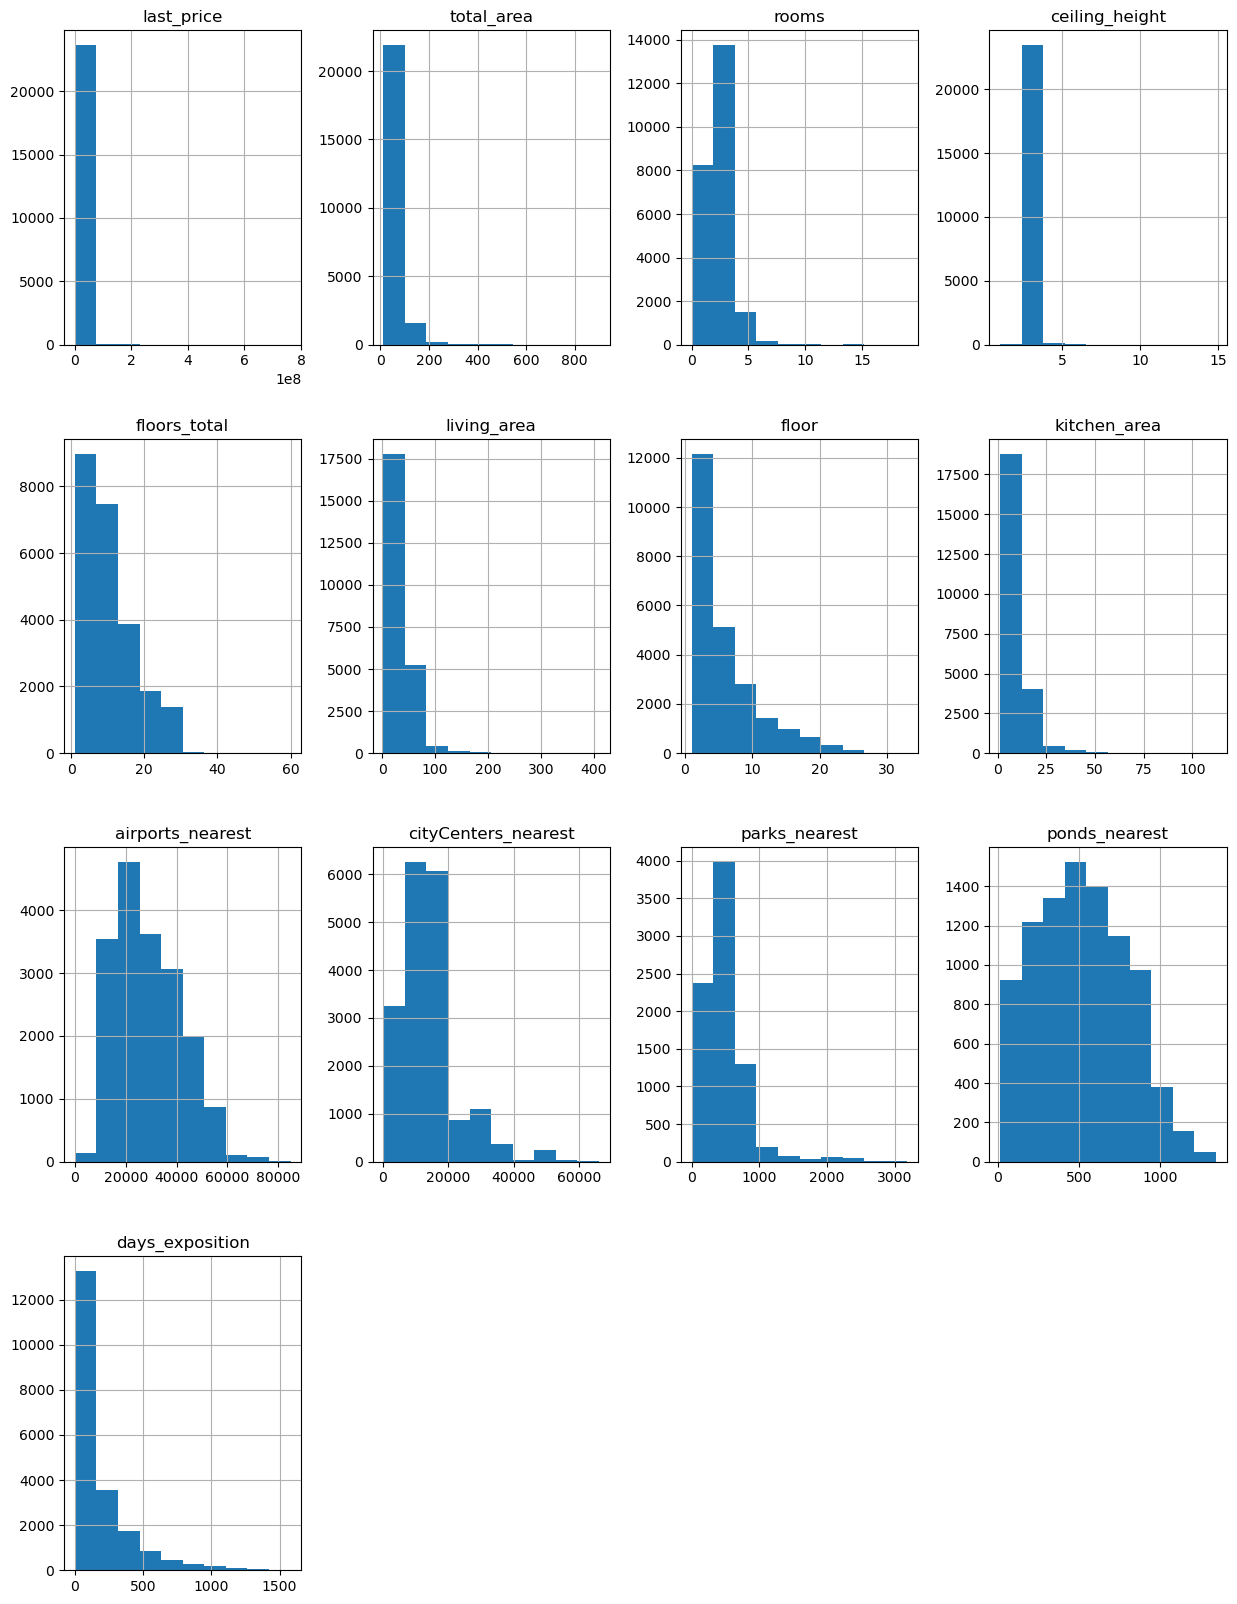

In [24]:
data[useful_cols].hist(figsize=(15, 20));

***Наблюдение*** 
Данные распределены неоднородно. Имеются аномалии, которые повлияют на дальнейший анализ. Требуется фильтрация.

Построим диаграммы размаха для основных параметров - цена, площадь, число комнат.

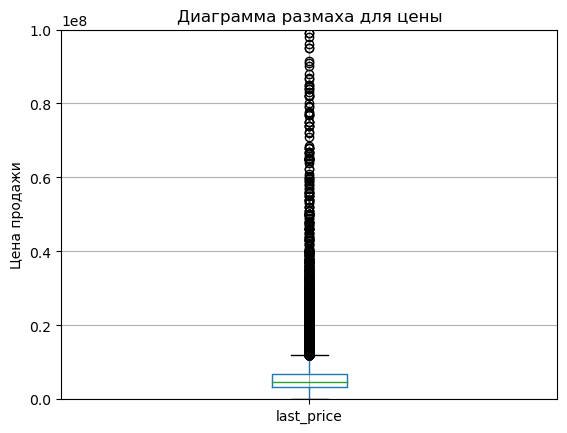

In [25]:
data.boxplot(column=['last_price'])
plt.ylim(0,100000000)
plt.title('Диаграмма размаха для цены')
plt.ylabel('Цена продажи')
plt.show()

In [26]:
data[data['last_price'] > 100000000]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
793,20,"135,000,000.000",310.000,2018-05-22,4,3.300,5.000,250.000,2,True,...,50.000,0.000,Санкт-Петербург,"34,159.000","7,251.000",2.000,295.000,3.000,190.000,342.000
1026,20,"155,000,000.000",310.000,2018-10-12,5,5.300,3.000,190.000,3,True,...,63.000,2.000,Санкт-Петербург,"24,899.000","4,785.000",0.000,NaN,1.000,603.000,NaN
1188,20,"118,000,000.000",290.600,2018-06-01,6,3.820,6.000,188.700,3,True,...,22.000,1.000,Санкт-Петербург,"25,309.000","6,224.000",1.000,217.000,0.000,NaN,316.000
1300,14,"120,000,000.000",280.000,2018-07-12,5,4.700,4.000,162.000,3,True,...,30.000,0.000,Санкт-Петербург,"24,680.000","4,247.000",1.000,464.000,3.000,339.000,225.000
1436,19,"330,000,000.000",190.000,2018-04-04,3,3.500,7.000,95.000,5,True,...,40.000,0.000,Санкт-Петербург,"23,011.000","1,197.000",3.000,519.000,3.000,285.000,233.000
1928,11,"125,000,000.000",224.500,2017-01-24,4,3.000,4.000,163.500,3,False,...,30.000,1.000,Санкт-Петербург,"22,805.000","2,335.000",0.000,NaN,2.000,497.000,174.000
2243,9,"130,278,280.000",304.000,2015-07-24,5,3.110,9.000,91.785,7,True,...,15.100,0.000,Санкт-Петербург,"25,593.000","5,913.000",2.000,164.000,0.000,NaN,599.000
2536,16,"159,984,000.000",242.400,2015-08-27,4,3.850,9.000,131.000,7,True,...,20.000,0.000,Санкт-Петербург,"21,946.000","2,242.000",1.000,679.000,1.000,227.000,501.000
3117,19,"140,000,000.000",631.000,2019-03-30,7,2.550,5.000,145.000,5,True,...,60.000,0.000,Санкт-Петербург,"25,707.000","4,972.000",0.000,NaN,2.000,210.000,NaN
4996,20,"124,000,000.000",124.500,2017-10-12,4,3.000,4.000,67.200,2,False,...,20.000,0.000,Санкт-Петербург,"20,399.000","1,722.000",3.000,302.000,3.000,172.000,45.000


In [27]:
len(data[data['last_price'] > 100000000]) / len(data[data['locality_name'] == 'Санкт-Петербург'])

0.0023535398511545067

Отфильтруем объекты стоимостью более 100 млн руб, таковых 37 и все они находятся в Санкт-Петербурге. Они составляют около 2% от общего числа объектов недвижимости в Санкт-Петербурге, поэтому их удаление не помешает анализу.

In [28]:
filtered_data = data.query('last_price <= 100000000')

In [29]:
filtered_data.shape

(23662, 22)

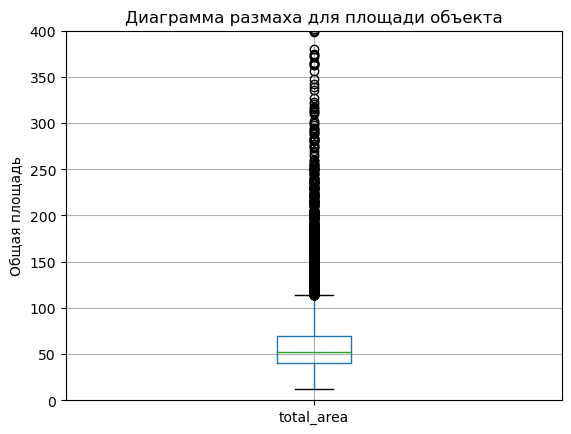

In [30]:
filtered_data.boxplot(column=['total_area'])
plt.title('Диаграмма размаха для площади объекта')
plt.ylabel('Общая площадь')
plt.ylim(0,400)
plt.show()

In [31]:
filtered_data[filtered_data['total_area'] > 400]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
660,3,"49,950,000.000",483.900,2017-10-04,7,3.200,6.000,312.500,4,True,...,26.400,0.000,Санкт-Петербург,"23,079.000",945.000,3.000,461.000,3.000,22.000,391.000
3676,12,"28,789,000.000",441.980,2019-01-23,4,3.000,6.000,63.600,6,True,...,35.050,0.000,Санкт-Петербург,"20,552.000","5,181.000",0.000,NaN,0.000,NaN,NaN
4237,1,"50,000,000.000",517.000,2017-10-14,7,3.000,4.000,332.000,3,True,...,22.000,0.000,Санкт-Петербург,"22,835.000","1,847.000",2.000,477.000,2.000,540.000,NaN
5358,20,"65,000,000.000",590.000,2019-02-14,15,3.500,6.000,409.000,3,True,...,100.000,0.000,Санкт-Петербург,"24,447.000","4,666.000",1.000,767.000,0.000,NaN,14.000
6221,8,"34,000,000.000",470.300,2018-01-14,4,2.800,3.000,248.700,3,True,...,40.000,0.000,Санкт-Петербург,"43,756.000","15,459.000",1.000,852.000,3.000,122.000,179.000
6621,20,"99,000,000.000",488.000,2017-04-09,5,2.950,20.000,216.000,17,True,...,50.000,0.000,Санкт-Петербург,"27,641.000","4,598.000",1.000,646.000,1.000,368.000,351.000
8018,20,"84,000,000.000",507.000,2015-12-17,5,4.450,7.000,301.500,7,True,...,45.500,1.000,Санкт-Петербург,NaN,"5,735.000",2.000,110.000,0.000,NaN,"1,078.000"
9826,1,"43,185,328.000",494.100,2017-05-12,1,2.850,12.000,17.600,3,True,...,9.040,0.000,Санкт-Петербург,"28,529.000","6,832.000",1.000,592.000,0.000,NaN,5.000
12401,20,"91,500,000.000",495.000,2017-06-19,7,4.650,7.000,347.500,7,True,...,25.000,0.000,Санкт-Петербург,NaN,"5,735.000",2.000,110.000,0.000,NaN,14.000
14088,8,"51,000,000.000",402.000,2017-02-07,6,3.150,8.000,300.000,6,True,...,56.000,2.000,Санкт-Петербург,"24,484.000","5,052.000",1.000,253.000,0.000,NaN,32.000


In [32]:
len(filtered_data[filtered_data['total_area'] > 400]) / len(data)

0.0005907422254103549

In [33]:
len(filtered_data[filtered_data['total_area'] > 400]) / len(data[data['locality_name'] == 'Санкт-Петербург'])

0.0008905285923287323

Отфильтруем 14 объектов из Санкт-Петербурга общей площадью более 400 кв м. Они составляют менее 1% от исходных данных и менее 1% от объектов Санкт-Петербурга. Их удаление безопасно для дальнейшего анализа.

In [34]:
filtered_data = filtered_data.query('total_area <= 400')

In [35]:
filtered_data.shape

(23648, 22)

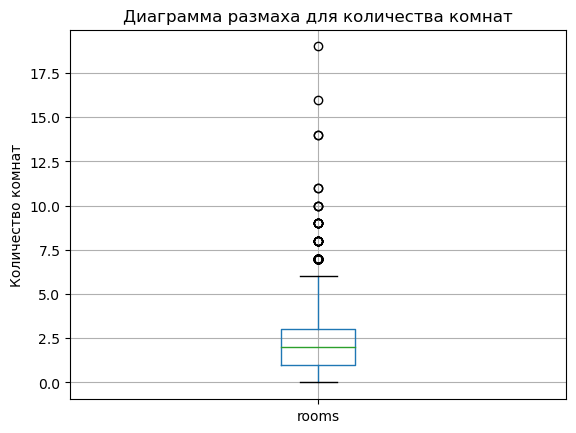

In [36]:
filtered_data.boxplot(column=['rooms'])
plt.title('Диаграмма размаха для количества комнат')
plt.ylabel('Количество комнат')
plt.show()

In [37]:
filtered_data[filtered_data['rooms'] > 10]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
648,3,"17,500,000.000",183.700,2018-07-01,11,3.400,7.000,138.800,7,True,...,13.300,0.000,Санкт-Петербург,"23,606.000","3,148.000",0.000,NaN,0.000,NaN,NaN
866,5,"25,000,000.000",363.000,2017-12-23,14,3.160,5.000,222.000,4,True,...,16.600,0.000,Санкт-Петербург,"38,076.000","7,950.000",0.000,NaN,2.000,435.000,418.000
9688,8,"33,000,000.000",194.100,2017-02-07,11,3.430,5.000,129.000,2,True,...,11.900,0.000,Санкт-Петербург,"21,469.000","1,015.000",1.000,686.000,2.000,66.000,813.000
14498,6,"32,250,000.000",374.600,2018-06-09,19,2.550,5.000,264.500,2,True,...,27.600,0.000,Санкт-Петербург,"19,497.000","3,574.000",0.000,NaN,2.000,548.000,114.000
18848,6,"28,500,000.000",270.000,2015-03-02,16,3.000,4.000,180.000,4,True,...,13.000,1.000,Санкт-Петербург,"23,575.000","4,142.000",1.000,516.000,0.000,NaN,"1,365.000"
20829,6,"28,659,000.000",245.400,2016-03-31,14,3.000,4.000,168.300,2,True,...,25.900,0.000,Санкт-Петербург,"21,104.000","2,054.000",3.000,541.000,2.000,118.000,95.000


In [38]:
len(filtered_data[filtered_data['rooms'] > 10]) / len(data)

0.0002531752394615807

Отфильтруем объекты, где больше 10 комнат, таковых 6.

In [39]:
filtered_data = filtered_data.query('rooms <= 10')

In [40]:
len(filtered_data) / len(data)

0.9975948352251149

In [41]:
len(filtered_data[filtered_data['locality_name'] == 'Санкт-Петербург']) / len(data[data['locality_name'] == 'Санкт-Петербург'])

0.9963742764455187

Итого были удалены менее 1% данных, что не повредит дальнейшему анализу.

### Добавление в таблицу новых столбцов

In [42]:
filtered_data['sq_m_price'] = filtered_data['last_price'] / filtered_data['total_area'] 
#цена одного квадратного метра

In [43]:
filtered_data['weekday'] = filtered_data['first_day_exposition'].dt.weekday  
#день недели публикации объявления (0 — понедельник, 1 — вторник и тд)

In [44]:
filtered_data['month'] = filtered_data['first_day_exposition'].dt.month 
#месяц публикации объявления

In [45]:
filtered_data['year'] = filtered_data['first_day_exposition'].dt.year 
#год публикации объявления

In [46]:
def floor_type (row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors_total:
        return 'последний'
    return 'другой'
filtered_data['floor_type'] = filtered_data.apply(floor_type, axis=1) 
#тип этажа

In [47]:
filtered_data['to_cityCenter'] = filtered_data['cityCenters_nearest'] / 1000
filtered_data['to_cityCenter'] = filtered_data['to_cityCenter'].round() 
#расстояние до центра города в километрах

In [48]:
filtered_data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_m_price,weekday,month,year,floor_type,to_cityCenter
0,20,"13,000,000.000",108.000,2019-03-07,3,2.700,16.000,51.000,8,True,...,482.000,2.000,755.000,NaN,"120,370.370",3,3,2019,другой,16.000
1,7,"3,350,000.000",40.400,2018-12-04,1,2.750,11.000,18.600,1,True,...,NaN,0.000,NaN,81.000,"82,920.792",1,12,2018,первый,19.000
2,10,"5,196,000.000",56.000,2015-08-20,2,2.550,5.000,34.300,4,True,...,90.000,2.000,574.000,558.000,"92,785.714",3,8,2015,другой,14.000
3,0,"64,900,000.000",159.000,2015-07-24,3,2.600,14.000,45.000,9,True,...,84.000,3.000,234.000,424.000,"408,176.101",4,7,2015,другой,7.000
4,2,"10,000,000.000",100.000,2018-06-19,2,3.030,14.000,32.000,13,True,...,112.000,1.000,48.000,121.000,"100,000.000",1,6,2018,другой,8.000


### Исследовательский анализ данных

#### Исследуем параметры объектов

In [49]:
parameters = ['total_area', 'living_area','kitchen_area', 'last_price', 'rooms', \
              'ceiling_height', 'floor', 'floors_total',\
               'cityCenters_nearest','airports_nearest', 'parks_nearest', 'month', 'weekday']

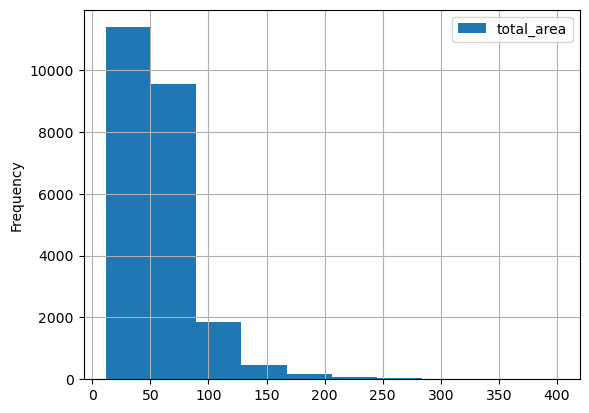

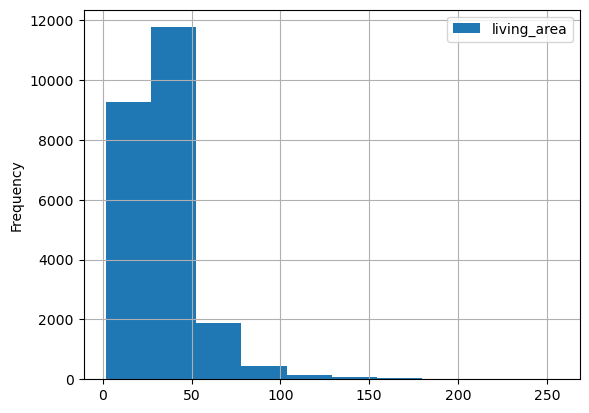

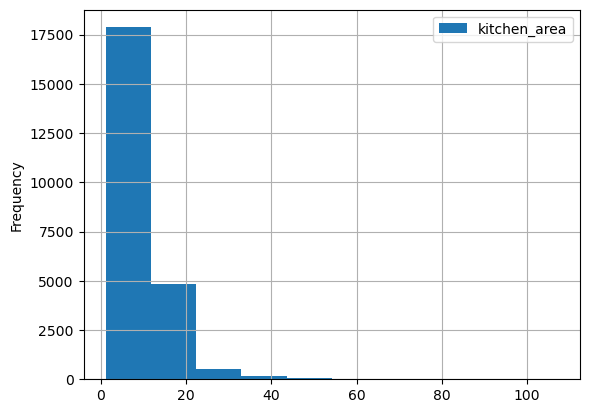

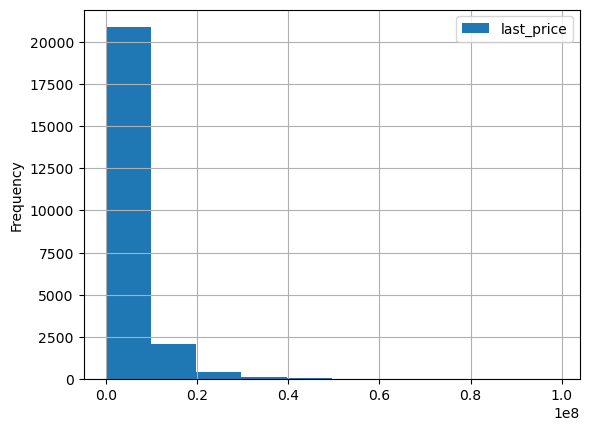

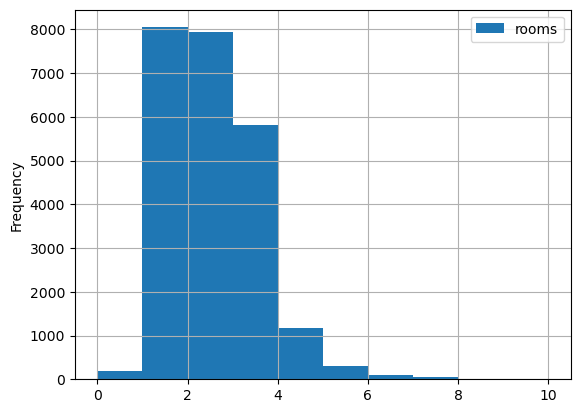

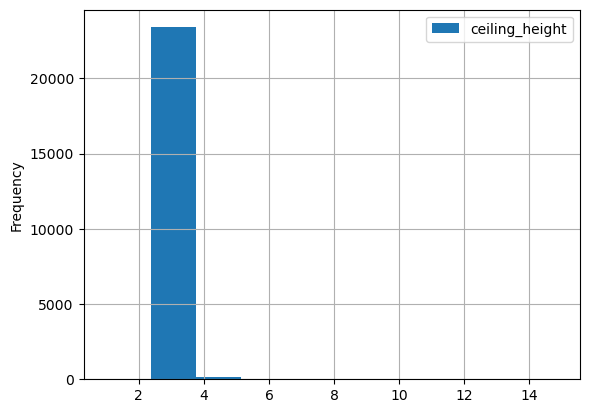

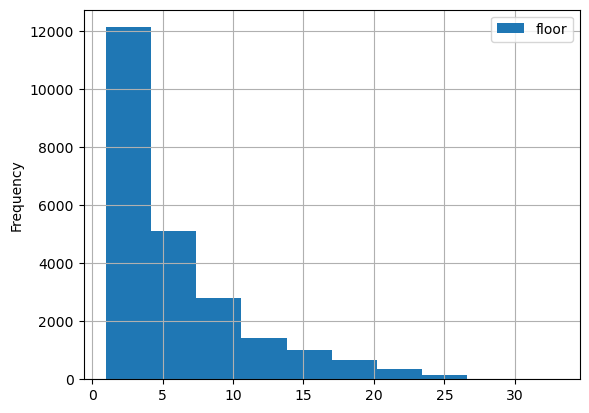

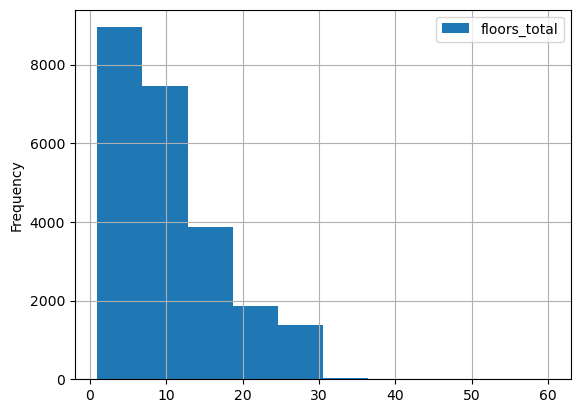

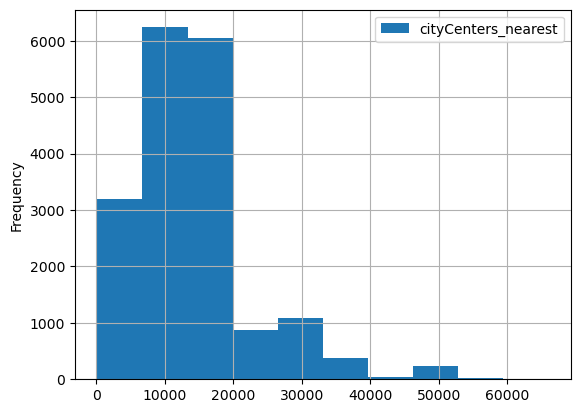

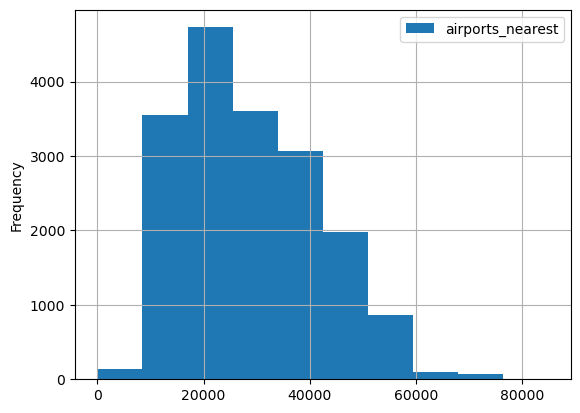

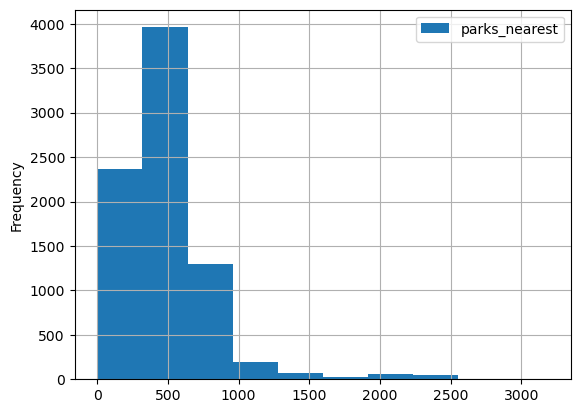

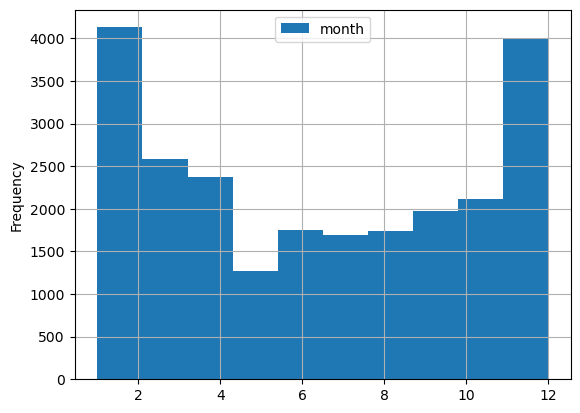

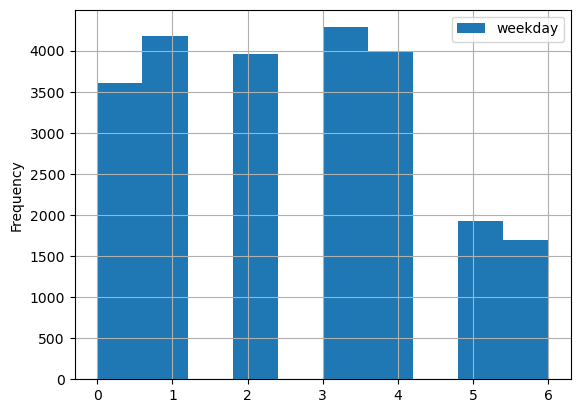

In [50]:
for p in parameters:
    filtered_data.plot(y=p, kind='hist', grid=True)

In [51]:
len(filtered_data.query('total_area < 100')) / len(filtered_data)

0.9217071313763641

Подавляющее число объектов (92%) имеют площадь до 100 кв. м. 

In [52]:
len(filtered_data.query('living_area < 50')) / len(filtered_data)

0.8669740292699433

Подавляющее число объектов (87%) имеют жилую площадь до 50 кв. м. 

In [53]:
len(filtered_data.query('kitchen_area < 15')) / len(filtered_data)

0.8751797648253109

Подавляющее число объектов (87%) имеют площадь кухни до 15 кв. м.

In [54]:
len(filtered_data.query('last_price < 10000000')) / len(filtered_data)

0.8847390237712546

Подавляющее число объектов (88%) стоят до 10 млн руб.

In [55]:
len(filtered_data.query('1 <= rooms <= 4')) / len(filtered_data)

0.971322223162169

Одно, двух- и трехкомнатных квартир примерно одинаковое количество. Четырехкомнатных примерно на треть меньше.
На остальные приходится около 3% объявлений.

In [56]:
len(filtered_data.query('ceiling_height > 4')) / len(filtered_data)

0.0019879874799086372

Высота потолков колеблется между 2 и 4 м, однако имеются отдельные объекты с высотой больше 4 м, их менее 1%

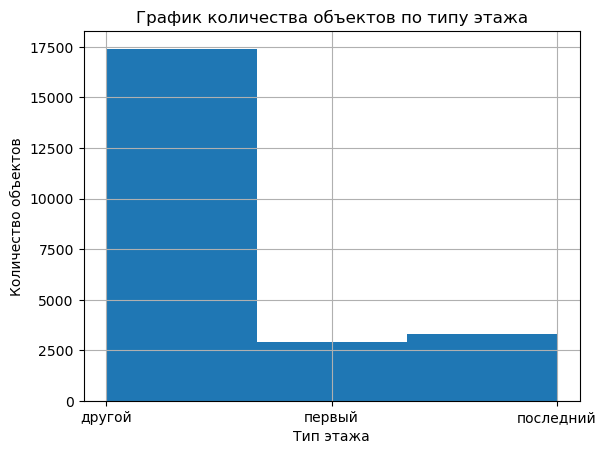

In [57]:
filtered_data['floor_type'].hist(bins=3) #тип этажа квартиры («первый», «последний», «другой»)
plt.title('График количества объектов по типу этажа')
plt.ylabel('Количество объектов')
plt.xlabel('Тип этажа')
plt.show()

In [58]:
len(filtered_data.query('floor_type == "другой"')) / len(filtered_data)

0.7364859148972168

Менее трети объявлений приходится на объекты на первом и последнем этажах.

In [59]:
len(filtered_data.query('floors_total < 20')) / len(filtered_data)

0.8715844683190931

Подавляющее число объектов (87%) находится в домах с общей этажностью менее 20.
Есть отдельные выбросы более 30, возможно ошибка в данных.

In [60]:
len(filtered_data.query('8000 <= cityCenters_nearest <= 20000')) / len(filtered_data)

0.499830809576178

Около половины объектов расположено на расстоянии от 8 до 20 км от центра города.

In [61]:
len(filtered_data.query('10000 <= airports_nearest <= 50000')) / len(filtered_data)

0.7010828187124609

70% объектов находится на расстоянии от 10 до 50 км от аэропорта.

In [62]:
len(filtered_data.query('parks_nearest <= 1000')) / len(filtered_data)

0.32408425683106334

32% объектов находятся в километре от ближайшего парка.

Пик публикаций приходится на два первых и два последних месяца года. Спад наблюдается в мае.
Большинство публикаций приходится на рабочие дни с пн по пятницу, что в два раза больше, чем в выходные.

#### Как быстро продавались квартиры?

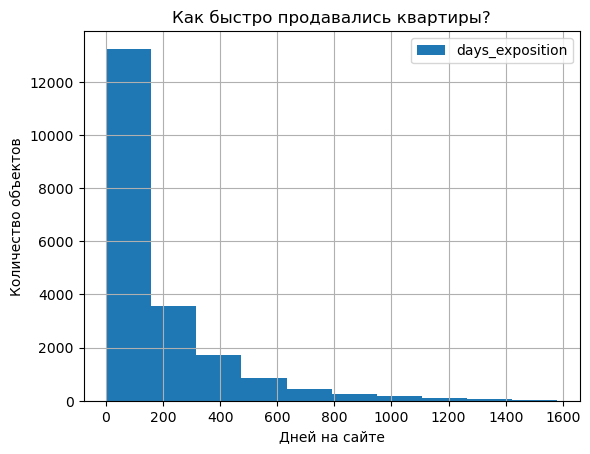

In [63]:
filtered_data.plot(y='days_exposition', kind='hist', grid=True)
plt.title('Как быстро продавались квартиры?')
plt.ylabel('Количество объектов')
plt.xlabel('Дней на сайте')
plt.show()

In [64]:
print(filtered_data['days_exposition'].mean(), filtered_data['days_exposition'].median())

180.52931118710308 95.0


In [65]:
filtered_data['days_exposition'].describe()

count   20,470.000
mean       180.529
std        219.322
min          1.000
25%         45.000
50%         95.000
75%        231.000
max      1,580.000
Name: days_exposition, dtype: float64

In [66]:
len(filtered_data.query('days_exposition < 45')) / len(filtered_data)

0.21512562388968784

In [67]:
len(filtered_data.query('days_exposition > 500')) / len(filtered_data)

0.07355553675661958

***Вывод*** В среднем квартиры продавались за 180 дней, однако на это значение повлияли необычно долгие значения более 500 дней, таких объектов около 7%, доля небольшая.
Быстрые продажи - продажи менее 45 дней, составляют 21% процент.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

##### Зависимость цены от общей площади

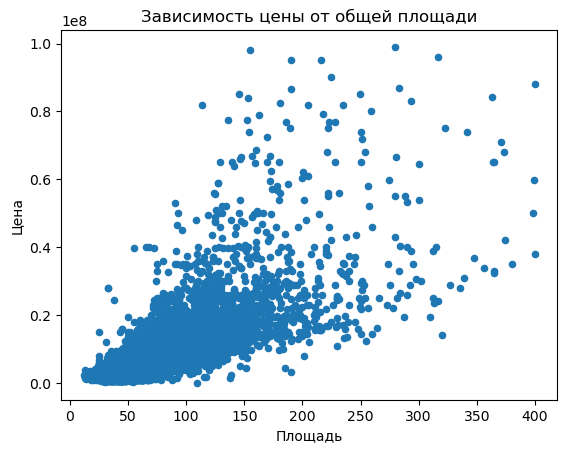

In [68]:
filtered_data.plot(x='total_area', y='last_price', kind='scatter')
plt.title('Зависимость цены от общей площади')
plt.ylabel('Цена')
plt.xlabel('Площадь')
plt.show()

In [69]:
filtered_data['total_area'].corr(filtered_data['last_price'])

0.7637079465661667

Наблюдается положительная зависимость цены объекта от общей площади.

##### Зависимость цены от жилой площади

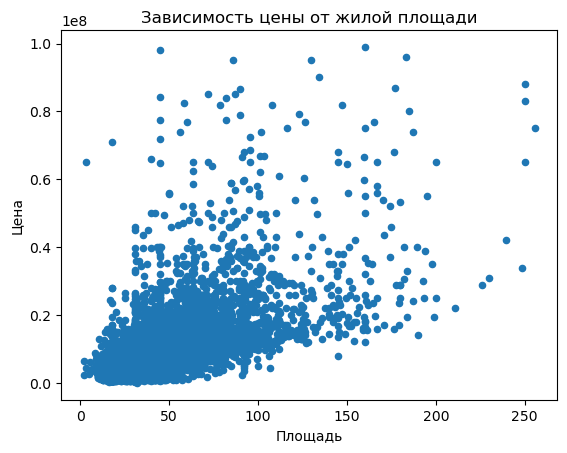

In [70]:
filtered_data.plot(x='living_area', y='last_price', kind='scatter')
plt.title('Зависимость цены от жилой площади')
plt.ylabel('Цена')
plt.xlabel('Площадь')
plt.show()

In [71]:
filtered_data['living_area'].corr(filtered_data['last_price'])

0.6453889199666945

Наблюдается положительная зависимость цены объекта от жилой площади.

##### Зависимость цены от площади кухни

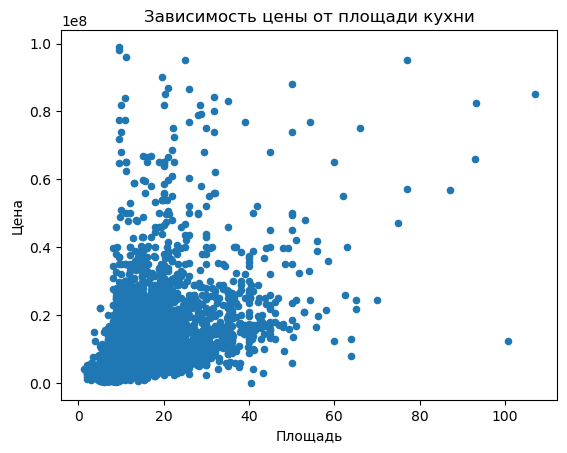

In [72]:
filtered_data.plot(x='kitchen_area', y='last_price', kind='scatter')
plt.title('Зависимость цены от площади кухни')
plt.ylabel('Цена')
plt.xlabel('Площадь')
plt.show()

In [73]:
filtered_data['kitchen_area'].corr(filtered_data['last_price'])

0.557856700043207

Наблюдается положительная зависимость цены объекта от площади кухни.

##### Зависимость цены от количества комнат

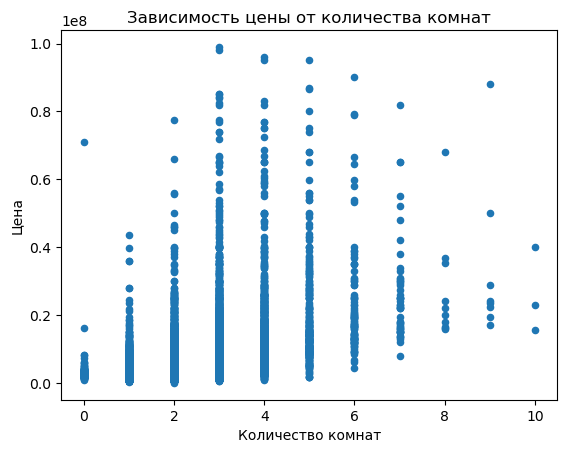

In [74]:
filtered_data.plot(x='rooms', y='last_price', kind='scatter')
plt.title('Зависимость цены от количества комнат')
plt.ylabel('Цена')
plt.xlabel('Количество комнат')
plt.show()

In [75]:
filtered_data['rooms'].corr(filtered_data['last_price'])

0.46675380707502206

Наблюдается рост зависимости цены от количества комнат в основном среди объектов до 50 млн руб.

##### Зависимость цены от этажа

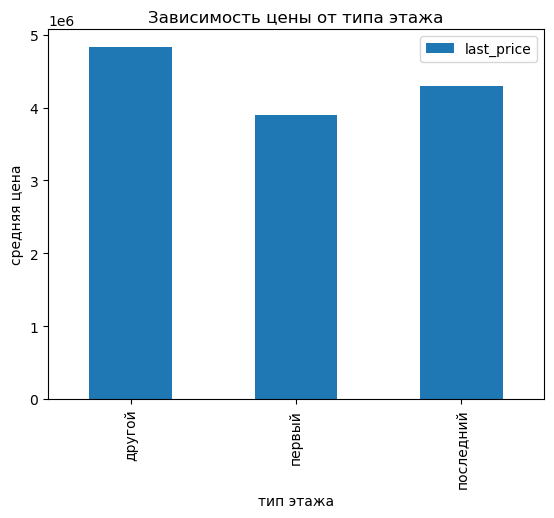

In [76]:
filtered_data.pivot_table(index='floor_type', values='last_price', aggfunc='median').\
plot(ylabel='средняя цена',xlabel='тип этажа', kind='bar')
plt.title('Зависимость цены от типа этажа')
plt.show()

Объекты на первом этаже как правило дешевле остальных.

##### Зависимость цены от даты размещения

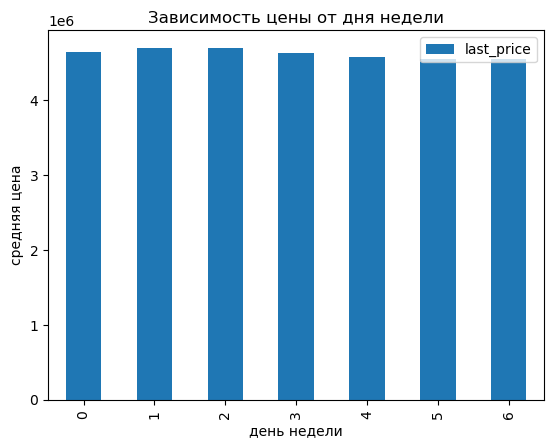

In [77]:
filtered_data.pivot_table(index='weekday', values='last_price', aggfunc='median').\
plot(ylabel='средняя цена',xlabel='день недели', kind='bar')
plt.title('Зависимость цены от дня недели')
plt.show()

Средняя цена объекта не зависит от дня публикации.

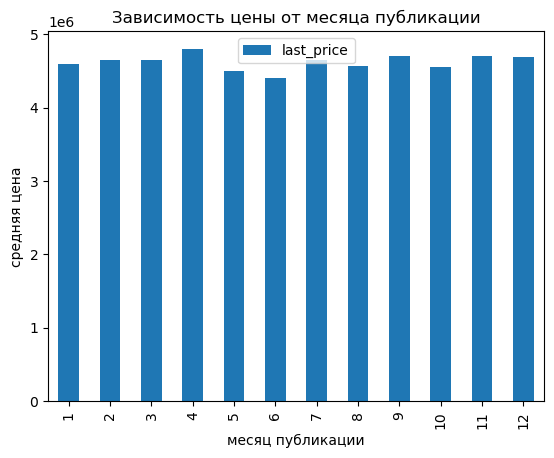

In [78]:
filtered_data.pivot_table(index='month', values='last_price', aggfunc='median').\
plot(ylabel='средняя цена',xlabel='месяц публикации', kind='bar')
plt.title('Зависимость цены от месяца публикации')
plt.show()

В среднем на цену объекта почти не влияет месяц публикации объявления.

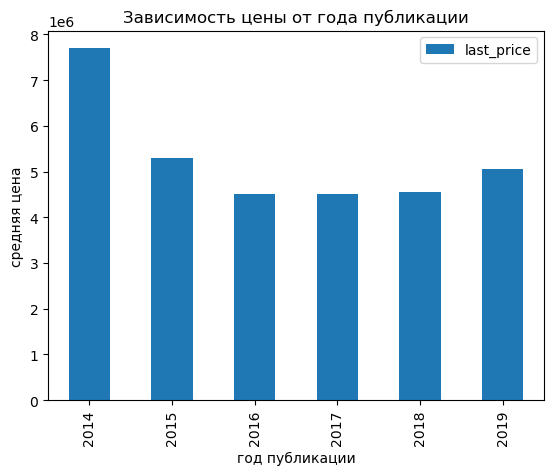

In [79]:
filtered_data.pivot_table(index='year', values='last_price', aggfunc='median').\
plot(ylabel='средняя цена',xlabel='год публикации', kind='bar')
plt.title('Зависимость цены от года публикации')
plt.show()

Средняя цена объектов недвижимости снизилась примерно на четверть в 2015 году относительно 2014, однако с 2016 по 2018 года оставалась на одном уровне. Небольшой рост цен наблюдается в 2019 году.

#### Выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

In [80]:
top10_localities = filtered_data['locality_name'].value_counts().head(10)
top10_localities

Санкт-Петербург    15664
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Name: locality_name, dtype: int64

In [81]:
top10_localities_data = filtered_data[filtered_data['locality_name'].isin(top10_localities.index)]
top10_localities_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_m_price,weekday,month,year,floor_type,to_cityCenter
0,20,"13,000,000.000",108.000,2019-03-07,3,2.700,16.000,51.000,8,True,...,482.000,2.000,755.000,NaN,"120,370.370",3,3,2019,другой,16.000
1,7,"3,350,000.000",40.400,2018-12-04,1,2.750,11.000,18.600,1,True,...,NaN,0.000,NaN,81.000,"82,920.792",1,12,2018,первый,19.000
2,10,"5,196,000.000",56.000,2015-08-20,2,2.550,5.000,34.300,4,True,...,90.000,2.000,574.000,558.000,"92,785.714",3,8,2015,другой,14.000
3,0,"64,900,000.000",159.000,2015-07-24,3,2.600,14.000,45.000,9,True,...,84.000,3.000,234.000,424.000,"408,176.101",4,7,2015,другой,7.000
4,2,"10,000,000.000",100.000,2018-06-19,2,3.030,14.000,32.000,13,True,...,112.000,1.000,48.000,121.000,"100,000.000",1,6,2018,другой,8.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,"3,550,000.000",35.300,2018-02-28,1,2.860,15.000,16.300,4,True,...,353.000,2.000,652.000,29.000,"100,566.572",2,2,2018,другой,16.000
23690,3,"5,500,000.000",52.000,2018-07-19,2,2.550,5.000,31.000,2,True,...,300.000,0.000,NaN,15.000,"105,769.231",3,7,2018,другой,6.000
23691,11,"9,470,000.000",72.900,2016-10-13,2,2.750,25.000,40.300,7,True,...,NaN,1.000,806.000,519.000,"129,903.978",3,10,2016,другой,4.000
23694,9,"9,700,000.000",133.810,2017-03-21,3,3.700,5.000,73.300,3,True,...,796.000,3.000,381.000,NaN,"72,490.845",1,3,2017,другой,4.000


In [82]:
top10_localities_data.groupby(by='locality_name')['sq_m_price'].mean().sort_values(ascending=False)

locality_name
Санкт-Петербург   113,597.740
Пушкин            103,125.819
Кудрово            95,324.931
Парголово          90,175.913
Мурино             86,087.512
Шушары             78,677.364
Колпино            75,424.579
Гатчина            68,746.147
Всеволожск         68,654.474
Выборг             58,141.909
Name: sq_m_price, dtype: float64

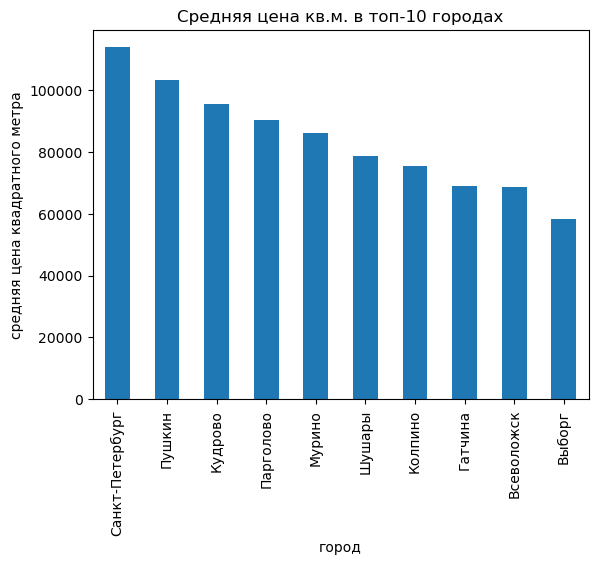

In [83]:
top10_localities_data.groupby(by='locality_name')['sq_m_price']\
.mean().sort_values(ascending=False)\
.plot(ylabel='средняя цена квадратного метра',xlabel='город', kind='bar')
plt.title('Cредняя цена кв.м. в топ-10 городах')
plt.show()

Самая низкая стоимость кв метра в Выборге (58,141.909 руб).
Самая высокая стоимость кв метра в Санкт-Петербурге (113,597.740 руб).

#### Как стоимость объектов зависит от расстояния до центра города на примере Санкт-Петербурга?

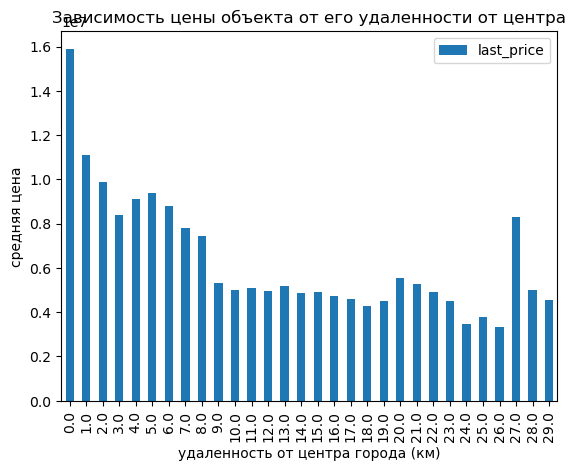

In [84]:
filtered_data.query('locality_name == "Санкт-Петербург"').\
pivot_table(index='to_cityCenter', values='last_price', aggfunc='median').\
plot(ylabel='средняя цена',xlabel='удаленность от центра города (км)', kind='bar')
plt.title('Зависимость цены объекта от его удаленности от центра')
plt.show()

Недвижимость в центре города дороже остальной. При удаленности объекта от центра на 1-9 км наблюдается плавный спад цен. С 9 до 19 км уровень цень примерно одинаков. Затем небольшой рост цен на 20 км и далее до 26 км плавный спад. Наблюдается пик на 27 км, средняя цена на нем сопоставима с ценой объектов на 3 км.

### Общий вывод

***Поставленная задача*** — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости Санкт-Петербуга и Ленинградской области.

Был проведен анализ данных сайта Яндекс.Недвижимость по объектам Санкт-Петербуга и Ленинградской области.
В ходе исследования выявлены следующие особенности.

- Подавляющее число объектов (92%) имеют площадь до 100 кв. м.
- Подавляющее число объектов (87%) имеют жилую площадь до 50 кв. м.
- Подавляющее число объектов (87%) имеют площадь кухни до 15 кв. м.
- Подавляющее число объектов (88%) стоят до 10 млн руб.
- Одно, двух- и трехкомнатных квартир примерно одинаковое количество. Четырехкомнатных примерно на треть меньше. На остальные приходится около 3% объявлений.
- Высота потолков колеблется между 2 и 4 м, однако имеются отдельные объекты с высотой больше 4 м, их менее 1%.
- Примерно половина объектов находится ниже 5 этажа.
- Менее трети объявлений приходится на объекты на первом и последнем этажах.
- Подавляющее число объектов (87%) находится в домах с общей этажностью менее 20. Есть отдельные выбросы более 30, возможно ошибка в данных.
- Около половины объектов расположено на расстоянии от 8 до 20 км от центра города.
- 70% объектов находится на расстоянии от 10 до 50 км от аэропорта.
- 32% объектов находятся в километре от ближайшего парка.
- Пик публикаций приходится на два первых и два последних месяца года. Спад наблюдается в мае. Большинство публикаций приходится на рабочие дни с пн по пятницу, что в два раза больше, чем в выходные.

В ходе анализа были выявлены следующие общие зависимости.

- Положительная зависимость стоимости объекта от жилой площади (в большей степени), а также от жилой площади и площади кухни (в меньшей степени).
- Наблюдается рост зависимости цены от количества комнат в основном среди объектов до 50 млн руб.
- Объекты на первом этаже в среднем стоят дешевле остальных.
- В среднем на цену объекта почти не влияет день и месяц публикации объявления.
- Средняя цена объектов недвижимости снизилась примерно на четверть в 2015 году относительно 2014, однако с 2016 по 2018 года оставалась на одном уровне. Небольшой рост цен наблюдается в 2019 году.
- Самая низкая стоимость кв метра в Выборге (58,141.909 руб). Самая высокая стоимость кв метра в Санкт-Петербурге (113,597.740 руб).

На примере Санкт-Петербурга было рассмотрено, как стоимость объектов зависит от расстояния до центра города.
Недвижимость в центре города дороже остальной. При удаленности объекта от центра на 1-9 км наблюдается плавный спад цен. С 9 до 19 км уровень цень примерно одинаков. Затем небольшой рост цен на 20 км и далее до 26 км плавный спад. Наблюдается пик на 27 км, средняя цена на нем сопоставима с ценой объектов на 3 км.